In [1]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')

In [65]:
import sklearn
print(sklearn.__version__)

1.2.2


In [67]:
import pickle

In [61]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [51]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [62]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [63]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [95]:
df.shape

(440832, 10)

In [94]:
df = df.dropna()

In [7]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Age
# Gender    ohe
# Tenure
# Usage Frequency
# Support Calls
# Payment Delay
# Subscription Type   ordinal
# Contract Length     ordinal
# Total Spend
# Last Interaction
# Churn

In [72]:
df = df.drop(columns=['CustomerID','Usage Frequency'])

In [73]:
df.shape

(440833, 10)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Churn'>

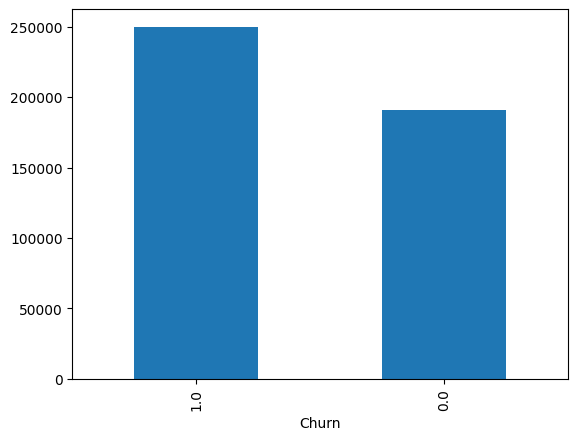

In [75]:
df['Churn'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

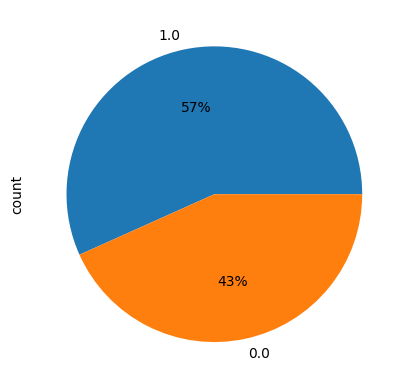

In [76]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [77]:
gender_churn_count = df.groupby('Gender')['Churn'].value_counts()

In [80]:
gender_churn_count

Gender  Churn
Female  1.0      127058
        0.0       63522
Male    0.0      127311
        1.0      122941
Name: count, dtype: int64

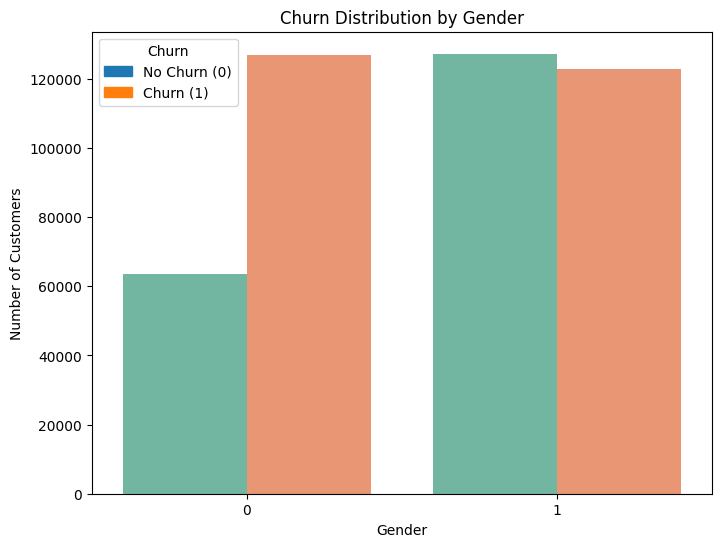

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

gender_churn_counts = df.groupby(['Gender', 'Churn']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Count', hue='Churn', data=gender_churn_counts, palette="Set2")


plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

handles, labels = plt.gca().get_legend_handles_labels()
churn_patch = mpatches.Patch(color='tab:blue', label='No Churn (0)')
no_churn_patch = mpatches.Patch(color='tab:orange', label='Churn (1)')


plt.legend(handles=[churn_patch, no_churn_patch], title='Churn')

plt.show()



In [97]:
df.head()

,Age,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,0,49.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,0,14.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,1,38.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,1,32.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [98]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, np.where(df['Gender']=='Female',0,df['Gender']))

<ipython-input-98-a005391f4499>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = np.where(df['Gender'] == 'Male', 1, np.where(df['Gender']=='Female',0,df['Gender']))


In [99]:
df['Gender'].value_counts()

Gender
1    250252
0    190580
Name: count, dtype: int64

In [100]:
X = df.iloc[:,0:-1]

In [101]:
y = df.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [103]:
X_train.shape, X_test.shape

((352665, 9), (88167, 9))

In [104]:
y_train.shape, y_test.shape

((352665,), (88167,))

In [105]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])
X_train['Contract Length'] = oe.fit_transform(X_train[['Contract Length']])
X_test['Contract Length'] = oe.transform(X_test[['Contract Length']])

In [106]:
oe = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
X_train['Subscription Type'] = oe.fit_transform(X_train[['Subscription Type']])
X_test['Subscription Type'] = oe.transform(X_test[['Subscription Type']])

In [107]:
X_train.head()


,Age,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
321745,24.0,1,58.0,0.0,4.0,0.0,2.0,665.22,29.0
175119,24.0,1,26.0,1.0,26.0,0.0,1.0,754.00,12.0
272448,18.0,1,36.0,0.0,7.0,2.0,1.0,852.86,9.0
66769,36.0,0,18.0,2.0,23.0,2.0,0.0,758.00,3.0
70297,57.0,0,27.0,8.0,15.0,0.0,0.0,688.00,10.0


In [108]:
X_test.head()

,Age,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
159565,23.0,0,10.0,8.0,16.0,2.0,1.0,589.00,13.0
127464,33.0,1,3.0,0.0,22.0,0.0,1.0,158.00,12.0
22398,27.0,0,57.0,0.0,24.0,1.0,2.0,915.00,26.0
99337,35.0,0,28.0,5.0,13.0,0.0,2.0,334.00,29.0
300997,28.0,1,53.0,2.0,5.0,0.0,2.0,568.86,15.0


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
params = {
    'n_estimators': [50, 100, 200, 400, 600, 1500],
    'max_features': ['auto', 'sqrt'],  # Fixed typo
    'max_samples': [0.3, 0.25, 0.5, 0.6],
    'criterion': ['gini', 'entropy'],  # Fixed typo
    'max_depth': [5, 10, 20,30],
    'bootstrap': [True, False],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 4]
}

In [112]:
# Apply GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=2, n_jobs=-1)

In [32]:
!pip install optuna

In [33]:
import optuna

In [34]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_categorical('n_estimators', [100, 200, 400, 600, 1500])
    max_depth = trial.suggest_categorical('max_depth', [5, 10, 20, 30, 50, 100])
    max_samples = trial.suggest_float('max_samples', 0.25, 0.6)  # Float for fraction
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_samples=max_samples,
        criterion=criterion,
        bootstrap=True
    )

    return cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy').mean()

In [35]:
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())

[I 2025-03-09 07:46:21,065] A new study created in memory with name: no-name-6de62e79-c109-4071-89d3-d1b14f54c283


In [37]:
study.optimize(objective,n_trials=10)

[I 2025-03-09 08:00:54,775] Trial 10 finished with value: 0.9991861969743328 and parameters: {'n_estimators': 400, 'max_depth': 50, 'max_samples': 0.38620103090078445, 'criterion': 'gini'}. Best is trial 6 with value: 0.9995236277368122.
[I 2025-03-09 08:01:39,919] Trial 11 finished with value: 0.9995434764008737 and parameters: {'n_estimators': 200, 'max_depth': 30, 'max_samples': 0.5968996365866215, 'criterion': 'gini'}. Best is trial 11 with value: 0.9995434764008737.
[I 2025-03-09 08:02:25,491] Trial 12 finished with value: 0.9995860096429656 and parameters: {'n_estimators': 200, 'max_depth': 50, 'max_samples': 0.5929628242223208, 'criterion': 'gini'}. Best is trial 12 with value: 0.9995860096429656.
[I 2025-03-09 08:03:10,549] Trial 13 finished with value: 0.9995406410497297 and parameters: {'n_estimators': 200, 'max_depth': 30, 'max_samples': 0.5966594018086402, 'criterion': 'gini'}. Best is trial 12 with value: 0.9995860096429656.
[I 2025-03-09 08:03:55,694] Trial 14 finished wi

In [38]:
study.best_trial.value

0.9996086941888347

In [39]:
study.best_trial.params

{'n_estimators': 200,
 'max_depth': 30,
 'max_samples': 0.5998737935529248,
 'criterion': 'gini'}

In [40]:
best_params = study.best_params

In [117]:
best_params = {
  'n_estimators': 200,
 'max_depth': 30,
 'max_samples': 0.5998737935529248,
 'criterion': 'gini'}

In [118]:
model = RandomForestClassifier(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    max_samples = best_params['max_samples'],
    bootstrap = True,
    criterion = best_params['criterion']
)

In [119]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_samples=0.5998737935529248,
                       n_estimators=200)

In [120]:
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9980037882654508


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [123]:
print("Train Accuracy ",model.score(X_train,y_train))
print("Test Accuracy ", model.score(X_test,y_test))

Train Accuracy  0.9984858151503552
Test Accuracy  0.9980037882654508


In [124]:
import pickle

# Save the trained model to a file
with open("/kaggle/working/churn_pred_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


In [54]:
clf = RandomForestClassifier(
    n_estimators = best_params['n_estimators'],
    max_depth = best_params['max_depth'],
    max_samples = best_params['max_samples'],
    criterion = 'entropy'
)

In [ ]:
cross_score = cross_val_score(clf,X,y,cv=5,scoring='accuracy')

In [ ]:
df

In [56]:
print("Cross val Score ",cross_score)
print("Mean Cross val Score ",cross_score.mean())

Cross val Score  [0.99982987 0.99968809 0.99982987 0.99985822 0.9997448  0.99991493
 0.99982986 0.99980151 0.99985822 0.99980151]
Mean Cross val Score  0.9998156894718411


In [54]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [58]:
import numpy as np

p = [18, 0, 1, 1, 5, 2, 0, 0, 123, 23]

In [59]:


# Reshape into (1, -1) to make it a 2D array
p_reshaped = np.array(p).reshape(1, -1)

# Predict
prediction = model.predict(p_reshaped)
print(prediction)


[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
